In [6]:
from tg.common import DataBundle, Loc
from yo_fluq_ds import *

db = DataBundle.load(Loc.data_cache_path/'bundles/tsatsa/bundles/small')

In [7]:
list(db.data_frames)

['index',
 'slovnet',
 'syntax_closure',
 'syntax_fixes',
 'syntax_stats',
 'pymorphy',
 'src']

Missing features: ['normal_form']


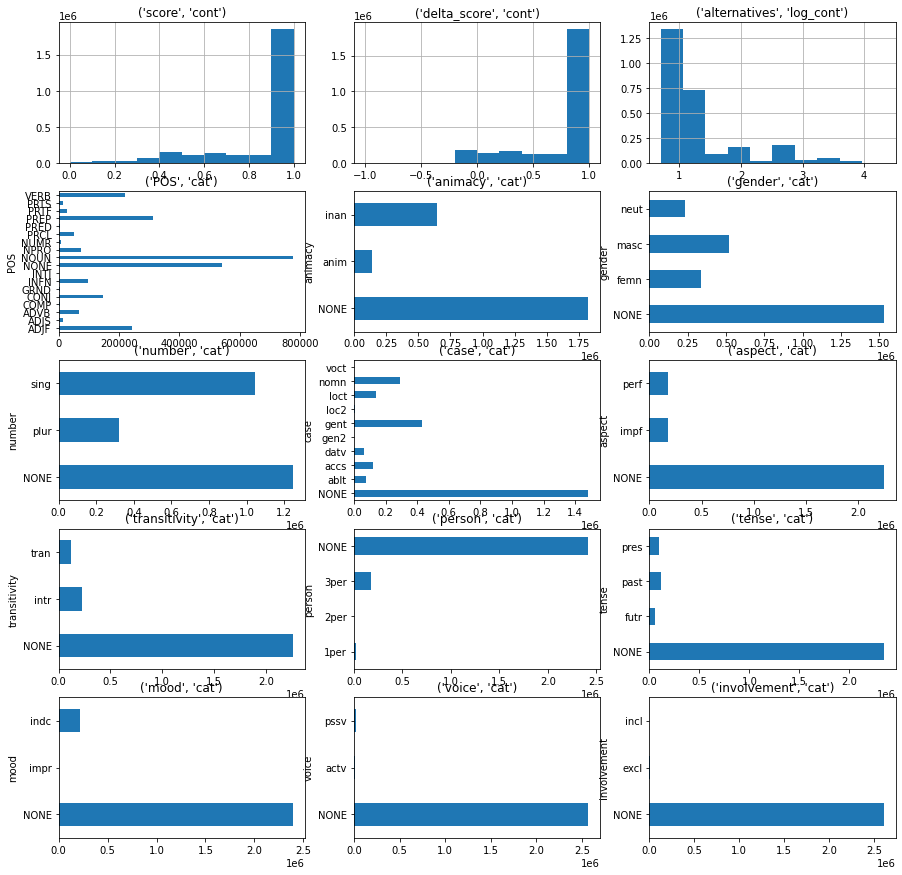

In [8]:
import numpy as np

def reverse_desc(desc):
    res = {}
    for key, value in desc.items():
        for it in value:
            res[it] = key
    return res

def draw(ax, column, df, mode):
    if mode=='cat':
        df[[column]].fillna('NONE').groupby(column).size().plot(ax=ax, kind='barh')
    elif mode=='cont':
        df[column].hist(ax=ax)
    elif mode=='log_cont':
        df[column].feed(lambda z: np.log(z+1)).hist(ax=ax)
    else: 
        raise ValueError(f'Unknown mode {mode}')

def rep(df, desc):
    rev = reverse_desc(desc) 
    print(f"Missing features: {[c for c in df.columns if c not in rev]}")
    Query.en(rev.items()).feed(fluq.with_plots(columns=3)).foreach(lambda z: draw(z.ax, z.item[0], df, z.item[1]))
    
    
pymorphy_features = dict(
    cont = [
        'score',
        'delta_score',
    ],
    log_cont = [
        'alternatives'
    ],
    cat = [
        'POS',
        'animacy',
        'gender',
        'number',
        'case',
        'aspect',
        'transitivity',
        'person',
        'tense',
        'mood',
        'voice',
        'involvement'
    ]
)

rep(db.pymorphy, pymorphy_features)

Missing features: ['relation', 'syntax_parent_id']


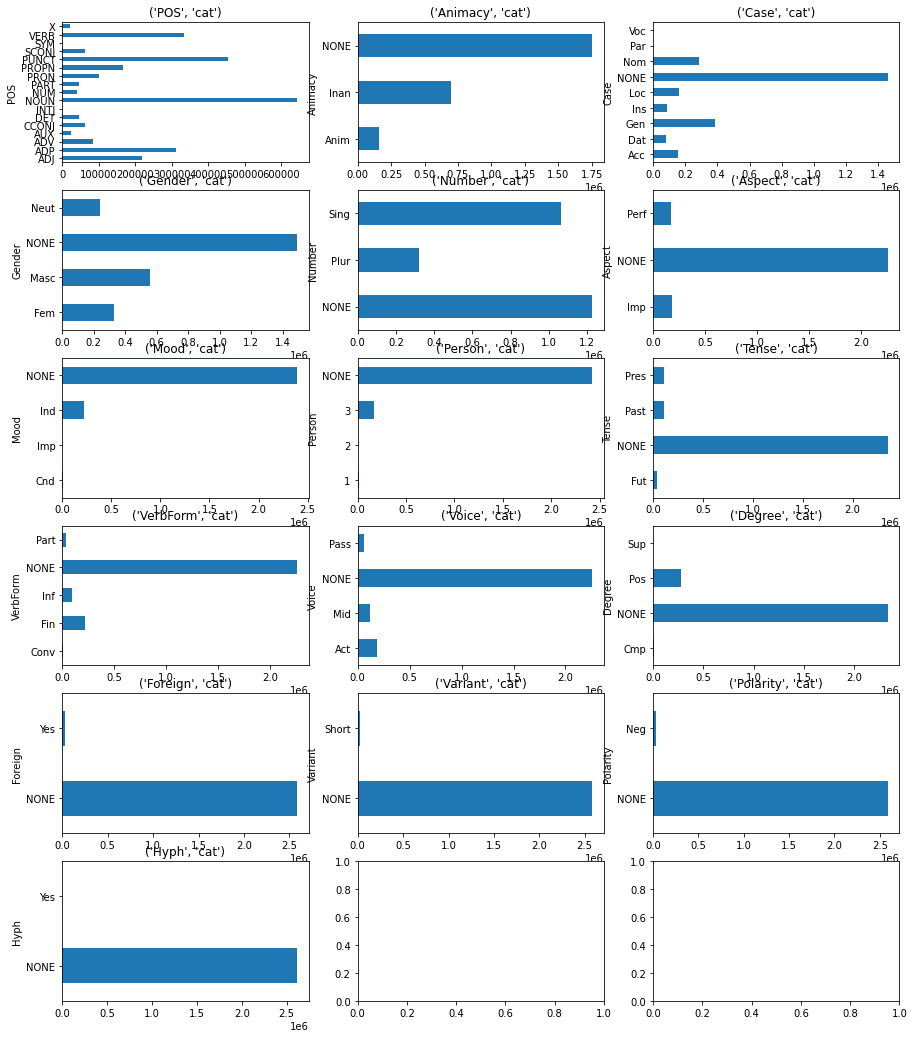

In [9]:
desc = {
    'cat': [
        'POS',
        'Animacy',
         'Case',
         'Gender',
         'Number',
         'Aspect',
         'Mood',
         'Person',
         'Tense',
         'VerbForm',
         'Voice',
         'Degree',
         'Foreign',
         'Variant',
         'Polarity',
         'Hyph'
    ]
}

rep(db.slovnet, desc)

Missing features: ['syntax_parent_id', 'correct_root']


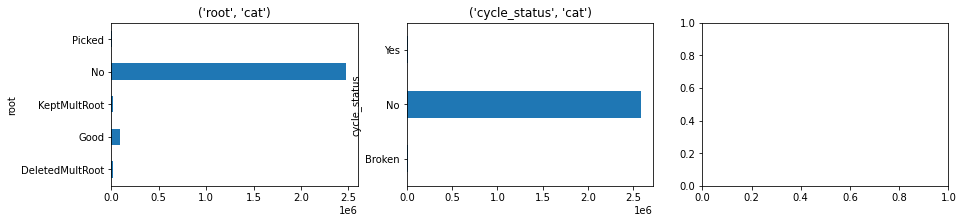

In [16]:
desc = dict(
    cat = [
         'root',
         'cycle_status',
    ]
)


rep(db.syntax_fixes, desc)

In [17]:
list(db.syntax_stats)

['children',
 'descendants',
 'up_depth',
 'down_depth',
 'sentence_length',
 'descendants_relative']

Missing features: []


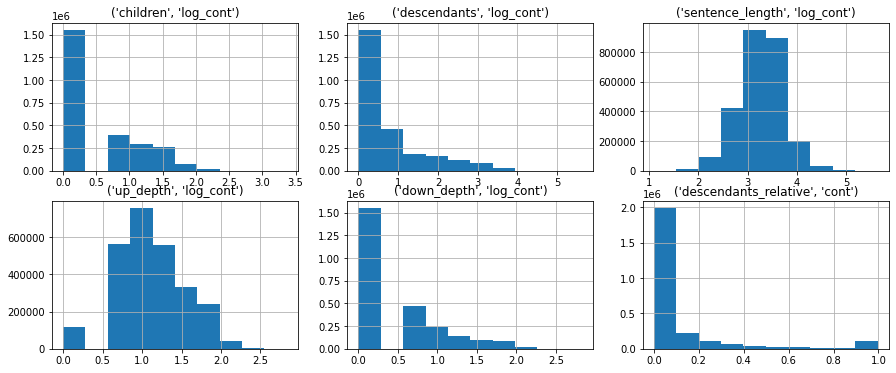

In [21]:
desc = dict(
    log_cont = [
 'children',
 'descendants',
 'sentence_length',
 'up_depth',
 'down_depth',
    ],
    cont = [
     'descendants_relative'
    ]
)


rep(db.syntax_stats, desc)